# NLP - Emotion Classification in Text

In [1]:
import pandas as pd

#loading dataset
df=pd.read_csv("nlp_dataset.csv")
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


# 1.Preprocessing Steps

Preprocessing is crucial for preparing the text data for analysis and modeling. Here are the key steps involved:

1.Text Cleaning

Text cleaning involves removing noise from the text. This includes:

a.Lowercasing: Converting all text to lowercase to ensure uniformity.

b.Removing punctuation and special characters: This helps in reducing variability and focuses on the words.

c.Removing numbers: Depending on the context, numbers might not contribute to emotion classification.

In [7]:
import re
import nltk
nltk.download('punkt')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text
df['clean_data'] = df['Emotion'].apply(clean_text)  # Replace 'Emotion' with your actual column name

df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Comment,Emotion,clean_data
0,i seriously hate one subject to death but now ...,fear,fear
1,im so full of life i feel appalled,anger,anger
2,i sit here to write i start to dig out my feel...,fear,fear
3,ive been really angry with r and i feel like a...,joy,joy
4,i feel suspicious if there is no one outside l...,fear,fear
...,...,...,...
5932,i begun to feel distressed for you,fear,fear
5933,i left feeling annoyed and angry thinking that...,anger,anger
5934,i were to ever get married i d have everything...,joy,joy
5935,i feel reluctant in applying there because i w...,fear,fear


2. Tokenization

Tokenization is the process of splitting text into individual words or tokens. This is essential for further analysis and model input.

In [8]:
from nltk.tokenize import word_tokenize

# Tokenize the cleaned text
df['tokens'] = df['clean_data'].apply(word_tokenize)
df

,Comment,Emotion,clean_data,tokens
0,i seriously hate one subject to death but now ...,fear,fear,[fear]
1,im so full of life i feel appalled,anger,anger,[anger]
2,i sit here to write i start to dig out my feel...,fear,fear,[fear]
3,ive been really angry with r and i feel like a...,joy,joy,[joy]
4,i feel suspicious if there is no one outside l...,fear,fear,[fear]
...,...,...,...,...
5932,i begun to feel distressed for you,fear,fear,[fear]
5933,i left feeling annoyed and angry thinking that...,anger,anger,[anger]
5934,i were to ever get married i d have everything...,joy,joy,[joy]
5935,i feel reluctant in applying there because i w...,fear,fear,[fear]


3. Removal of Stopwords

Stopwords are common words (like "and", "the", "is") that usually do not contribute to the meaning of the text. Removing these can help in focusing on the more meaningful words.

In [10]:
from nltk.corpus import stopwords

# Ensure the stopwords are downloaded
import nltk
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Emotion,clean_data,tokens
0,i seriously hate one subject to death but now ...,fear,fear,[fear]
1,im so full of life i feel appalled,anger,anger,[anger]
2,i sit here to write i start to dig out my feel...,fear,fear,[fear]
3,ive been really angry with r and i feel like a...,joy,joy,[joy]
4,i feel suspicious if there is no one outside l...,fear,fear,[fear]
...,...,...,...,...
5932,i begun to feel distressed for you,fear,fear,[fear]
5933,i left feeling annoyed and angry thinking that...,anger,anger,[anger]
5934,i were to ever get married i d have everything...,joy,joy,[joy]
5935,i feel reluctant in applying there because i w...,fear,fear,[fear]


# 2.Feature Extraction


Feature extraction is a critical step in preparing text data for machine learning models. This process converts text into numerical representations that can be used as input for various algorithms. Here, we’ll discuss using TfidfVectorizer, which is widely employed for text classification tasks.

Implementing TfidfVectorizer

To implement TfidfVectorizer, you first need to import it from the sklearn library and then fit it to your tokenized text data.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into a single string for each document
df['tokens_joined'] = df['tokens'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(df['tokens_joined'])

# 3. Model Development

To train machine learning models for emotion classification, we can use the Naive Bayes and Support Vector Machine (SVM) algorithms. Below,the steps to train both models using the scikit-learn library.

Step 1: Split the Dataset

First, split your dataset into training and testing sets. This allows you to evaluate the model's performance on unseen data.

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is the feature matrix and 'y' is the target variable
y = df['Emotion']  # Replace 'emotion_column' with your actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df


,Comment,Emotion,clean_data,tokens,tokens_joined
0,i seriously hate one subject to death but now ...,fear,fear,[fear],fear
1,im so full of life i feel appalled,anger,anger,[anger],anger
2,i sit here to write i start to dig out my feel...,fear,fear,[fear],fear
3,ive been really angry with r and i feel like a...,joy,joy,[joy],joy
4,i feel suspicious if there is no one outside l...,fear,fear,[fear],fear
...,...,...,...,...,...
5932,i begun to feel distressed for you,fear,fear,[fear],fear
5933,i left feeling annoyed and angry thinking that...,anger,anger,[anger],anger
5934,i were to ever get married i d have everything...,joy,joy,[joy],joy
5935,i feel reluctant in applying there because i w...,fear,fear,[fear],fear


Step 2: Train Naive Bayes Model

* Initialize the MultinomialNB model.
* Fit the model to the training data.
* Predict on the test data and evaluate the results using accuracy and classification report metrics.


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)
df

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00       392
        fear       1.00      1.00      1.00       416
         joy       1.00      1.00      1.00       380

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



,Comment,Emotion,clean_data,tokens,tokens_joined
0,i seriously hate one subject to death but now ...,fear,fear,[fear],fear
1,im so full of life i feel appalled,anger,anger,[anger],anger
2,i sit here to write i start to dig out my feel...,fear,fear,[fear],fear
3,ive been really angry with r and i feel like a...,joy,joy,[joy],joy
4,i feel suspicious if there is no one outside l...,fear,fear,[fear],fear
...,...,...,...,...,...
5932,i begun to feel distressed for you,fear,fear,[fear],fear
5933,i left feeling annoyed and angry thinking that...,anger,anger,[anger],anger
5934,i were to ever get married i d have everything...,joy,joy,[joy],joy
5935,i feel reluctant in applying there because i w...,fear,fear,[fear],fear


step 3: Train Support Vector Machine Model

use the Support Vector Classifier (SVC) with a linear kernel

* Initialize the SVC model with a linear kernel.
* Fit the model to the training data.
* Predict on the test data and evaluate similarly.


In [21]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

df

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00       392
        fear       1.00      1.00      1.00       416
         joy       1.00      1.00      1.00       380

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



,Comment,Emotion,clean_data,tokens,tokens_joined
0,i seriously hate one subject to death but now ...,fear,fear,[fear],fear
1,im so full of life i feel appalled,anger,anger,[anger],anger
2,i sit here to write i start to dig out my feel...,fear,fear,[fear],fear
3,ive been really angry with r and i feel like a...,joy,joy,[joy],joy
4,i feel suspicious if there is no one outside l...,fear,fear,[fear],fear
...,...,...,...,...,...
5932,i begun to feel distressed for you,fear,fear,[fear],fear
5933,i left feeling annoyed and angry thinking that...,anger,anger,[anger],anger
5934,i were to ever get married i d have everything...,joy,joy,[joy],joy
5935,i feel reluctant in applying there because i w...,fear,fear,[fear],fear


# 4.Model comparison

To compare the performance of the Naive Bayes and Support Vector Machine (SVM) models, Evaluate  using several metrics, including accuracy, F1-score, precision, and recall. These metrics provide insight into how well each model performs on the emotion classification task.

Evaluation Metrics:
    
Accuracy: The proportion of correctly classified instances among the total instances.


F1-Score: The harmonic mean of precision and recall, which is especially useful for imbalanced classes. It provides a balance between false positives and false negatives.

Precision: The ratio of correctly predicted positive observations to the total predicted positives.
 
Recall: The ratio of correctly predicted positive observations to all actual positives.


In [30]:
# For Naive Bayes
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)

# For SVM
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00       392
        fear       1.00      1.00      1.00       416
         joy       1.00      1.00      1.00       380

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00       392
        fear       1.00      1.00      1.00       416
         joy       1.00      1.00      1.00       380

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



# conclusion

Both your Naive Bayes and SVM models achieved an accuracy of 1.0, it suggests that both models perfectly classified the training data. However, it’s essential to analyze this result further to draw meaningful conclusions.

# Analyze the Confusion Matrix

Create a confusion matrix to visualize how the models performed across different classes. This can help identify if there are any classes that are being misclassified, even if overall accuracy is perfect.

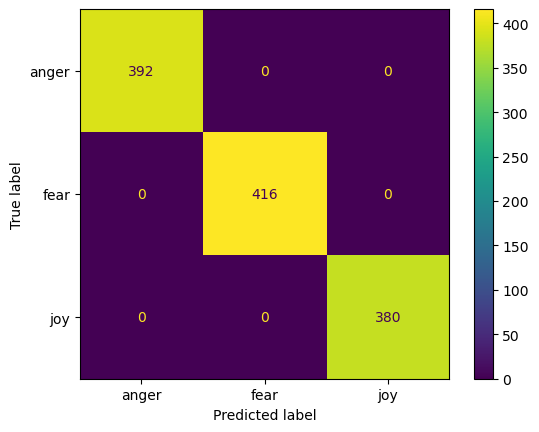

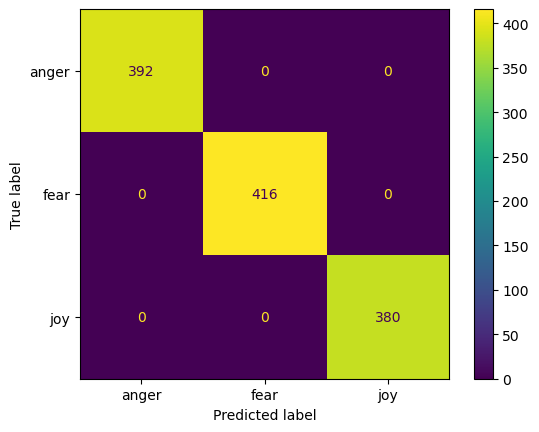

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
ConfusionMatrixDisplay(nb_cm, display_labels=vectorizer.get_feature_names_out()).plot()

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
ConfusionMatrixDisplay(svm_cm, display_labels=vectorizer.get_feature_names_out()).plot()


The classification reports show consistent performance across classes: so that both models are robust for this task.